#Import the needed Libraries

In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler

#Load the iris dataset

In [2]:
df = pd.DataFrame(datasets.load_iris().data,columns=datasets.load_iris().feature_names)
df['y'] = datasets.load_iris().target

#Assign the x,y values.
* To better visialize the story we just give two dimensinal data to the model. 


In [3]:
X =df.iloc[:,0:2].values
y =df.iloc[:,4:5].values

In [4]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#Applying The KMeans Algoritghm

In [5]:
kmeanscluster = KMeans (n_clusters=3)

In [6]:
kmeanscluster.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [7]:
kmeanscluster.fit(X)

KMeans(n_clusters=3)

In [8]:
df['y_pred'] = kmeanscluster.predict(X)

In [9]:
df['y_pred'].unique()

array([2, 1, 0], dtype=int32)

In [10]:
df['y'].unique()

array([0, 1, 2])

In [14]:
kmeanscluster.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [15]:
centroids   = kmeanscluster.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

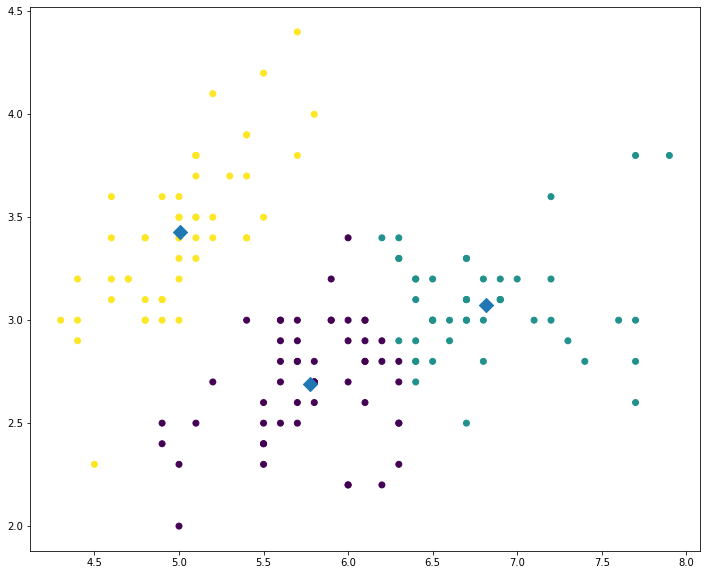

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x=X[:,0],y=X[:,1], c=kmeanscluster.predict(X))
plt.scatter(x=centroids_x,y=centroids_y,marker='D',s=100)
plt.show()

#Evaluating The model Performance
* Score gives us inertia which is the distance from centroids.

In [19]:
kmeanscluster.inertia_

37.05070212765956

To better decide what will be the number of clusters we draw the lineplot of inertia vs n_cluster

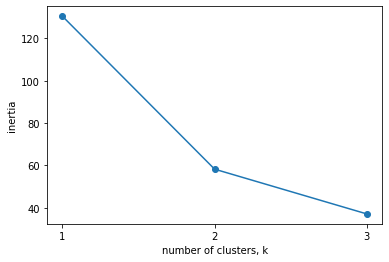

In [23]:
ks = range(1, 4)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [24]:
target_names = sklearn.datasets.load_iris().target_names
target_classes = np.unique(sklearn.datasets.load_iris().target)
targets = {target_classes[i]: target_names[i] for i in range(len(target_classes))}
targets

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

Crosstab shows us better visiulize predictions vs true values. İts basically confusion matrix.

In [26]:
pd.crosstab(df['y_pred'],df['y'])

y,0,1,2
y_pred,,,
0,0,38,15
1,0,12,35
2,50,0,0


In [30]:
from  sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(df['y'],df['y_pred']))
print(confusion_matrix(df['y'],df['y_pred']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.26      0.24      0.25        50
           2       0.00      0.00      0.00        50

    accuracy                           0.08       150
   macro avg       0.09      0.08      0.08       150
weighted avg       0.09      0.08      0.08       150

[[ 0  0 50]
 [38 12  0]
 [15 35  0]]


# Scaling The Data
With Kmeans Clustering its so important that data points have been standardized 
We will create a pipeline to standardize and 

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
clust = KMeans(n_clusters=3)
pipe = make_pipeline(scaler,clust)

In [64]:
clust.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [65]:
pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [66]:
pipe.score(X)

-102.61774156677953

-37.05070212765956 after scaling models give worse score.
We need to further investigate this problem.



In [ ]:
X

#...